# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem because it maps from some input to a small number of descrete possibilities (Will fail or won't fail in this case). Regression problems maps their input to a real number and usually the possible outputs are infite.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [4]:

# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1 #The last column is the target class, that is why we subtract 1.
passed_students = student_data[student_data['passed'] == 'yes']
failed_students = student_data[student_data['passed'] == 'no']

# TODO: Calculate passing students
n_passed = passed_students.shape[0]

# TODO: Calculate failing students
n_failed = failed_students.shape[0]

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/n_students * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [5]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [6]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)

print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train , X_test, y_train, y_test  = cross_validation.train_test_split(X_all, y_all, train_size=num_train, random_state= 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **

## SVM

#### Weaknesses: 

1) Slow to train on large data sets.

2) Is a binary classifier. For multiclass classification you will have to train 1 classifier per class in a 1 vs all way.

3) Knowing which Kernel to use is difficult.

#### Strengths : 

1) After training, it doesn't need to query values of the past, so it predicts fast.

2) Tries to maximize the margins. This tends do better when predicting new data.

3) Works with lots of complicated decision boundaries thanks to the kernel trick.

4) Works well even with few data.

#### General Aplications:

General classification and prediction. Used for disseases detection, Facial expression classification, among others.

#### Why did I chose it:


Because SVM can achieve very good accuracy even with few data points (which is our case). Altough SVM is slow when training with a lot of data points, we don't have much data points so we will be fine.



## Naive Bayes

#### Weaknesses: 

1) Assumes that the features are conditionally independent.
2) Provides probabilities that are not that accuarate, but if you don't care about the number itself but instead you are going to just output the class, then it is meaningful. 

#### Strengths:

1) Works well even if there are features missing in an example.

2) Easy to compute.

#### General Aplications:

Used only for classification problems. Used in : Credit approval, target marketing, medical diagnosis, spam filtering, text classification and more.


#### Why did I chose it:

First, because it is a really good classifier, although is a bad estimator. Also because we are searching for speed in this problem and Naive Bayes is relatively easy to compute. You just need to count to get the probabilities, and since we don't have a lot of data points, and there are only 2 classes (pass or fail), it will compute really fast.  



## Decision Tree


#### Weaknesses:

1) Easy to overfit.

2) Doesn't work if you have missing features in an example and the tree has a node where it examines that feature. 

#### Strengths:

1) Fast once is trained.

2) Can represent complicated boundaries.

3) Doesn't require much data preparation.

4) People that are not related to Machine Learning can understand easily if you provide a visual represntation of the tree.

#### General Aplications:

Decisions tree are used in multiple classification problems like: Finding students with learning dissabilities, tumor classification, stars classification from images from the hubble telescope, etc...


#### Why do I chose it?

Because the amount of data is small enough to don't get a complex tree. Therefore training and prediction will be pretty fast.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [16]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [17]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C

from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn

# TODO: Initialize the three models
clf_A = SVC(kernel='linear')
clf_B = GaussianNB()
clf_C = DecisionTreeClassifier()


# TODO: Set up the training set sizes
X_train_100 = X_train[0:100]
y_train_100 = y_train[0:100]

X_train_200 = X_train[100:300]
y_train_200 = y_train[100:300]

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
print("Classifier A")
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
print("=========================================================")
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
print("=========================================================")
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
print("=========================================================")

print("")
print("Classifier B")


train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
print("=========================================================")

train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
print("=========================================================")

train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
print("=========================================================")

print("")
print("Classifier C")

train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
print("=========================================================")

train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
print("=========================================================")

train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)
print("=========================================================")


Classifier A
Training a SVC using a training set size of 100. . .
Trained model in 0.0190 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8806.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7463.
Training a SVC using a training set size of 200. . .
Trained model in 0.0300 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.8787.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7846.
Training a SVC using a training set size of 300. . .
Trained model in 0.1650 seconds
Made predictions in 0.0110 seconds.
F1 score for training set: 0.8421.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.7826.

Classifier B
Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0030 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8550.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7481.
Training a GaussianNB using a training set size of 200. . .
Trained model 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVM**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0020                 |  0.0010                | 0.8806           |       0.7463    | 
| 200               |  0.0040                 |  0.0020                | 0.8787           |       0.7846    |
| 300               |  0.0110                 |  0.0040                |  0.8424          |       0.7826    |

** Classifer 2 - Naive Bayes**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0010              | 0.0030                 |   0.8550         | 0.7481          |
| 200               |     0.0020              | 0.0010                 |   0.7926         | 0.7385          |
| 300               |     0.0020              | 0.0010                 |   0.8088         | 0.7500          |

** Classifer 3 - DecissionTreeClassifier**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0010                  | 0.0000                 | 1                | 0.6885          |
| 200               | 0.0010                  | 0.0010                 | 1                | 0.7419          |
| 300               | 0.0020                  | 0.0010                 | 1                | 0.7377          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

We have concluded our tests on the data to see which model to choose, and the tests revealed that the best model for this task is SVM. The SVM model has one of the biggest F1 score among the tested models, combined with a very fast prediction time. Using SVM will lower the resources and time used in the servers, therefore lowering the costs.

Getting into more details, the  model's prediction time is around 0.0040 seconds. This prediction time is fast enough to not consume too many time and resources in the servers, therefore it won't cost much. It has the biggest F1 scores of all algorithms with 0.7826. Although Naive Bayes and Decision Tree performed a little faster (0.0010 seconds per prediction), it has a lower F1 score (0.75 for NB and 0.7377 for DecisionTree). We think that SVM's prediction time is fast enough, so we will prefer having better predictions with SVM over the speed boost of Naive Bayes or DecisionTree.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

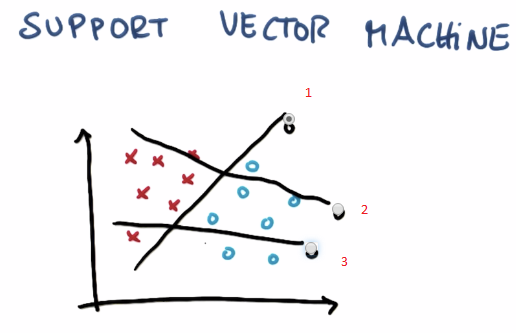

In [10]:

from IPython.core.display import Image 
Image('svm.png')

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [18]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
import sklearn.metrics as metrics

c_values = np.linspace(0.009,1.0)

# TODO: Create the parameters list you wish to tune
parameters = {'C' : c_values , "kernel": ['rbf','linear','poly']}

# TODO: Initialize the classifier
clf = clf_A


def f1(y_real, y_predict):
    return f1_score(y_real, y_predict,pos_label = 'yes')
    #true_pos = np.sum(y_real[y_predict == 1])
    #recall = true_pos/np.sum(y_real==1)
    #precision = true_pos/np.sum(y_predict == 1)
    
    #return (precision*recall)/(precision+recall)
    
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = metrics.make_scorer(f1)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = None

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

grid_obj.fit(X_all, y_all)
# Get the estimator
clf = grid_obj.best_estimator_

y_predict = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)


# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

print "Accuracy is {:.4f}.".format(accuracy)


Made predictions in 0.0260 seconds.
Tuned model has a training F1 score of 0.8419.
Made predictions in 0.0090 seconds.
Tuned model has a testing F1 score of 0.7945.
Accuracy is 0.6842.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The final F1 score for the test set is 0.7945. Before tunning the paramaters the F1 score was 0.7826 for the test set. The tunned model has more probability of classifying correctly (that is what the F1 score is telling us). After tunning the paramaters we saw a modest increase increase in the F1 score for the testing set of about 2%. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.